In [3]:
#import das libs
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Conv2D, MaxPooling2D, Flatten
from keras.optimizers import RMSprop

In [5]:
#Obtendo dataset Minist
#Já no keras
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [7]:
#No modelo normal, transformamos a imagem 2D em um vetor 28*28= 784
#x_train = x_train.reshape(60000, 784)
#x_test = x_test.reshape(10000, 784)

#O modelo convolucional entra com a imagem 2D 
#o dataset tem cada dígito 28x28

img_rows = 28
img_cols = 28
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)
print(x_train[0])
#Normalizando para valores entre 0 e 1
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train[0])

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')



[[[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]


In [8]:
#ajustando o formato da saída
num_classes = 10

#O dataset tem como saída os labels
print(y_train[0])
#Convertendo para um vetor de saída com 10 dimensões 
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(y_train[0])


5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [9]:
#Modelo convolucional

model = Sequential()
model.add(Conv2D(20, kernel_size=(2,2),
         activation='relu',
         input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 27, 27, 20)        100       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 20)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 20)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3380)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               338100    
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total para

In [10]:
#Compila o modelo
model.compile(loss='categorical_crossentropy',
             optimizer=RMSprop(),
             metrics=['accuracy'])

In [11]:
#Treina com os parte dos dados
batch_size = 128
epochs = 10
#epochs = 10
history = model.fit(x_train, y_train,
                   batch_size=batch_size,
                   epochs=epochs,
                   verbose=1,
                   validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 42s 706us/step - loss: 0.4257 - acc: 0.8740 - val_loss: 0.1542 - val_acc: 0.9533
Epoch 2/10
60000/60000 [==============================] - 39s 657us/step - loss: 0.2019 - acc: 0.9411 - val_loss: 0.1015 - val_acc: 0.9693
Epoch 3/10
60000/60000 [==============================] - 42s 698us/step - loss: 0.1522 - acc: 0.9555 - val_loss: 0.0815 - val_acc: 0.9751
Epoch 4/10
60000/60000 [==============================] - 43s 716us/step - loss: 0.1334 - acc: 0.9602 - val_loss: 0.0702 - val_acc: 0.9772
Epoch 5/10
60000/60000 [==============================] - 42s 708us/step - loss: 0.1226 - acc: 0.9639 - val_loss: 0.0697 - val_acc: 0.9792
Epoch 6/10
60000/60000 [==============================] - 43s 722us/step - loss: 0.1134 - acc: 0.9672 - val_loss: 0.0686 - val_acc: 0.9795
Epoch 7/10
60000/60000 [==============================] - 43s 715us/step - loss: 0.1085 - acc: 0.9688 - val_loss: 0.

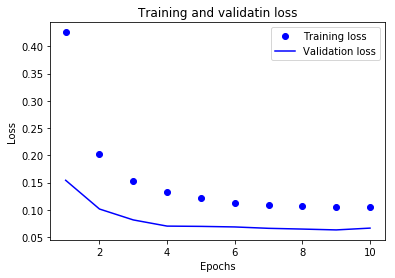

In [13]:
#visualizar o treino 
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs_x = range(1, epochs + 1)
plt.plot(epochs_x, loss_values, 'bo', label='Training loss')
plt.plot(epochs_x, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validatin loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

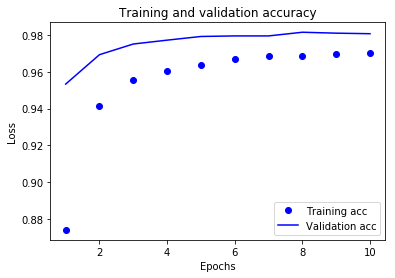

In [14]:
#Como a acuracia evoluiu
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs_x, acc_values, 'bo', label='Training acc')
plt.plot(epochs_x, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [15]:
#Teste
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy', score[1])

Test loss: 0.06648027869588695
Test accuracy 0.9807


In [22]:
#Testando uma entrada qualquer...
print(y_train[10])
print(model.predict(x_train[10].reshape((1,img_rows, img_cols, 1))))
print(model.predict_classes(x_train[10].reshape((1,img_rows, img_cols,1))))

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[[1.44275414e-09 1.73314202e-05 5.42584303e-07 9.99891639e-01
  1.11164695e-08 7.70033075e-05 2.65128579e-11 5.26839692e-08
  2.93824769e-06 1.04552300e-05]]
[3]


In [26]:
#Vendo alguns reports
#usando sklearn
from sklearn.metrics import classification_report, confusion_matrix

#classificando toda a base de teste
y_pred = model.predict_classes(x_test)
#voltando ao formato de classes
import numpy as np
y_test_c = np.argmax(y_test, axis=1)


print('Confusion Matrix')
print(confusion_matrix(y_test_c, y_pred))
print('Classification Report')
target_names = ['0','1','2', '3', '4', '5', '6', '7', '8', '9']
print(classification_report(y_test_c, y_pred, target_names=target_names))

Confusion Matrix
[[ 974    0    1    0    0    0    3    1    1    0]
 [   0 1125    1    2    0    0    3    1    3    0]
 [   3    5 1008    2    3    0    1    9    1    0]
 [   0    0    0 1000    0    3    0    4    2    1]
 [   1    0    2    0  974    0    0    0    0    5]
 [   2    1    1    8    1  873    5    0    1    0]
 [  10    5    0    0    4    5  933    0    1    0]
 [   2    8    9    2    0    0    0 1004    1    2]
 [   5    1    3    3    3    3    0    3  943   10]
 [   4    4    1    7   12    1    0    6    1  973]]
Classification Report
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.99      0.98      1010
           4       0.98      0.99      0.98       982
           5       0.99      0.98      0.98       892
           6       0.99      0.97      0.98       9